In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [2]:
api_url = 'https://dog.ceo/api/breeds/list/all'
headers = {'accept': 'application/json'}
response = requests.get(api_url, headers=headers)
data = response.json()

In [3]:
response = requests.get(api_url)

In [4]:
if response.status_code == 200:
    data = response.json()

    print(data)
else:
    print(f"Error: {response.status_code} - {response.reason}")

{'message': {'affenpinscher': [], 'african': [], 'airedale': [], 'akita': [], 'appenzeller': [], 'australian': ['shepherd'], 'basenji': [], 'beagle': [], 'bluetick': [], 'borzoi': [], 'bouvier': [], 'boxer': [], 'brabancon': [], 'briard': [], 'buhund': ['norwegian'], 'bulldog': ['boston', 'english', 'french'], 'bullterrier': ['staffordshire'], 'cattledog': ['australian'], 'chihuahua': [], 'chow': [], 'clumber': [], 'cockapoo': [], 'collie': ['border'], 'coonhound': [], 'corgi': ['cardigan'], 'cotondetulear': [], 'dachshund': [], 'dalmatian': [], 'dane': ['great'], 'deerhound': ['scottish'], 'dhole': [], 'dingo': [], 'doberman': [], 'elkhound': ['norwegian'], 'entlebucher': [], 'eskimo': [], 'finnish': ['lapphund'], 'frise': ['bichon'], 'germanshepherd': [], 'greyhound': ['italian'], 'groenendael': [], 'havanese': [], 'hound': ['afghan', 'basset', 'blood', 'english', 'ibizan', 'plott', 'walker'], 'husky': [], 'keeshond': [], 'kelpie': [], 'komondor': [], 'kuvasz': [], 'labradoodle': [],

In [5]:
breeds_data = data['message']

In [6]:
breed_names = []
sub_breed_names = []

In [7]:
sub_breed_names
breed_names

[]

In [8]:
for breed, sub_breeds in breeds_data.items():
    # If the breed has sub-breeds
    if sub_breeds:
        # Iterate over sub-breeds
        for sub_breed in sub_breeds:
            # Add breed and sub-breed to lists
            breed_names.append(breed)
            sub_breed_names.append(sub_breed)
    else:
        # If no sub-breeds, add breed to list and append None for sub-breed
        breed_names.append(breed)
        sub_breed_names.append(None)  # Append None for sub-breed


In [9]:
df = pd.DataFrame({'Breed': breed_names, 'Sub Breed': sub_breed_names})
df

,Breed,Sub Breed
0,affenpinscher,None
1,african,None
2,airedale,None
3,akita,None
4,appenzeller,None
...,...,...
143,vizsla,None
144,waterdog,spanish
145,weimaraner,None
146,whippet,None


In [10]:
df.drop_duplicates(inplace=True)
df

,Breed,Sub Breed
0,affenpinscher,None
1,african,None
2,airedale,None
3,akita,None
4,appenzeller,None
...,...,...
143,vizsla,None
144,waterdog,spanish
145,weimaraner,None
146,whippet,None


In [11]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Breed      148 non-null    object
 1   Sub Breed  82 non-null     object
dtypes: object(2)
memory usage: 2.4+ KB
None


In [12]:
print("\nOriginal Dataset:")
print(df.head())


Original Dataset:
           Breed Sub Breed
0  affenpinscher      None
1        african      None
2       airedale      None
3          akita      None
4    appenzeller      None


In [13]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
          Breed Sub Breed
count       148        82
unique       98        63
top     terrier   english
freq         23         6


In [14]:
#One-hot encoding
# Replace NaN values with mean for numerical columns and mode for categorical columns
for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        # Replace NaN values with mean for numerical columns
        df[column].fillna(df[column].mean(), inplace=True)
    elif df[column].dtype == 'object':
        # Replace NaN values with mode for categorical columns
        df[column].fillna(df[column].mode()[0], inplace=True)

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df)

# Display the encoded dataframe
print(df_encoded.head())


   Breed_affenpinscher  Breed_african  Breed_airedale  Breed_akita  \
0                 True          False           False        False   
1                False           True           False        False   
2                False          False            True        False   
3                False          False           False         True   
4                False          False           False        False   

   Breed_appenzeller  Breed_australian  Breed_basenji  Breed_beagle  \
0              False             False          False         False   
1              False             False          False         False   
2              False             False          False         False   
3              False             False          False         False   
4               True             False          False         False   

   Breed_bluetick  Breed_borzoi  ...  Sub Breed_standard  Sub Breed_sussex  \
0           False         False  ...               False             False

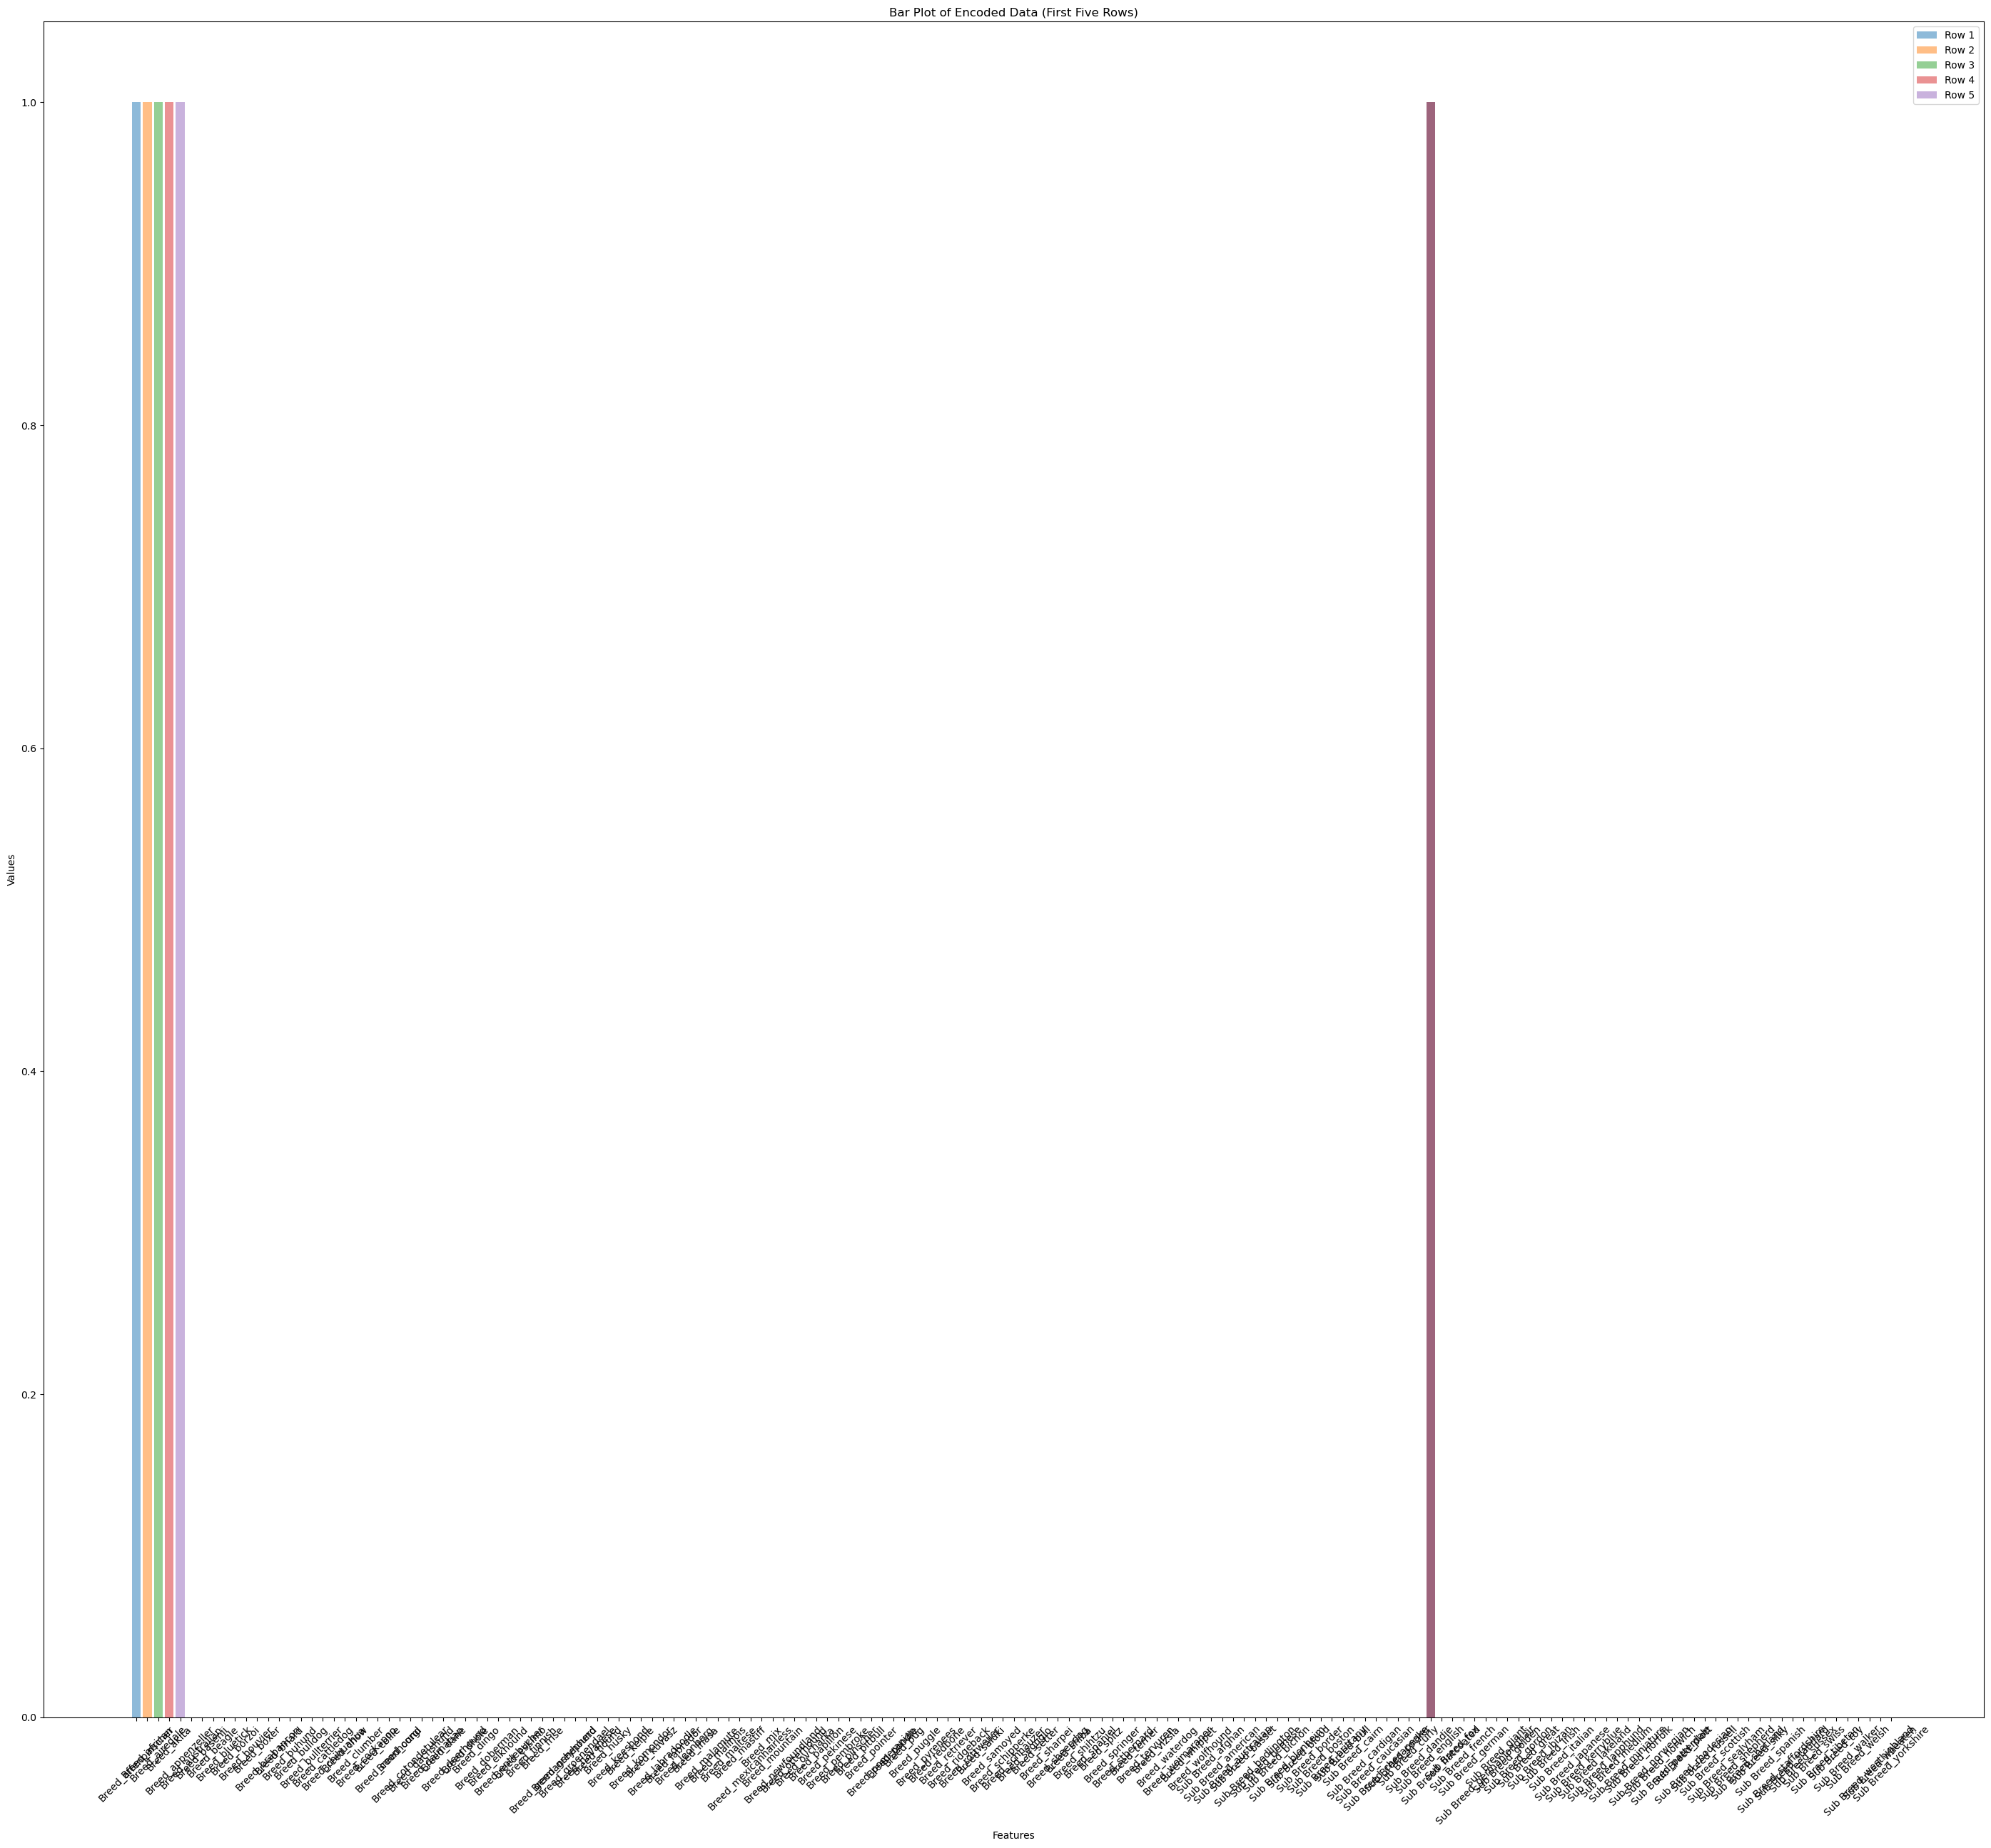

In [15]:
# Select the first five rows of the encoded dataframe for visualization
df_subset = df_encoded.head()

# Plot a bar plot for each row (assuming rows represent individual data points)
plt.figure(figsize=(28, 26))
for i, (_, row) in enumerate(df_subset.iterrows()):
    plt.bar(x=row.index, height=row.values, alpha=0.5, label=f'Row {i+1}')

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Bar Plot of Encoded Data (First Five Rows)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
df[column]

0      english
1      english
2      english
3      english
4      english
        ...   
143    english
144    spanish
145    english
146    english
147      irish
Name: Sub Breed, Length: 148, dtype: object

In [17]:
print("\nNumber of Unique Breeds:", df['Breed'].nunique())
print("Number of Unique Sub-Breeds:", df['Sub Breed'].nunique())


Number of Unique Breeds: 98
Number of Unique Sub-Breeds: 63


In [18]:
df.Breed

0      affenpinscher
1            african
2           airedale
3              akita
4        appenzeller
           ...      
143           vizsla
144         waterdog
145       weimaraner
146          whippet
147        wolfhound
Name: Breed, Length: 148, dtype: object

In [19]:
df.dropna(inplace=True)

In [20]:
df_numeric = df.drop('Breed', axis=1)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

In [21]:
breed_counts = df['Breed'].value_counts()
df['Breed_Count'] = df['Breed'].map(breed_counts)
print(df.head())

           Breed Sub Breed  Breed_Count
0  affenpinscher   english            1
1        african   english            1
2       airedale   english            1
3          akita   english            1
4    appenzeller   english            1


In [22]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]
df_numeric

,Breed_Count
0,1
1,1
2,1
3,1
4,1
...,...
143,1
144,1
145,1
146,1


In [23]:
if df_numeric.empty:
    print("DataFrame df_numeric is empty. No numeric data found in the dataset.")
elif df_numeric.isnull().values.any():
    # Handle missing values (e.g., by imputing or removing them)
    df_numeric.dropna(inplace=True)

In [24]:
scaler = StandardScaler()
scaler.fit(df_numeric)

StandardScaler()

In [25]:
df_scaled = scaler.transform(df_numeric)

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)
print("Shape of df_scaled:", df_scaled.shape)
cluster_labels = kmeans.labels_

C:\Users\sawan\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sawan\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Shape of df_scaled: (148, 1)


In [27]:
df['Cluster'] = cluster_labels
df.Cluster

0      0
1      0
2      0
3      0
4      0
      ..
143    0
144    0
145    0
146    0
147    0
Name: Cluster, Length: 148, dtype: int32

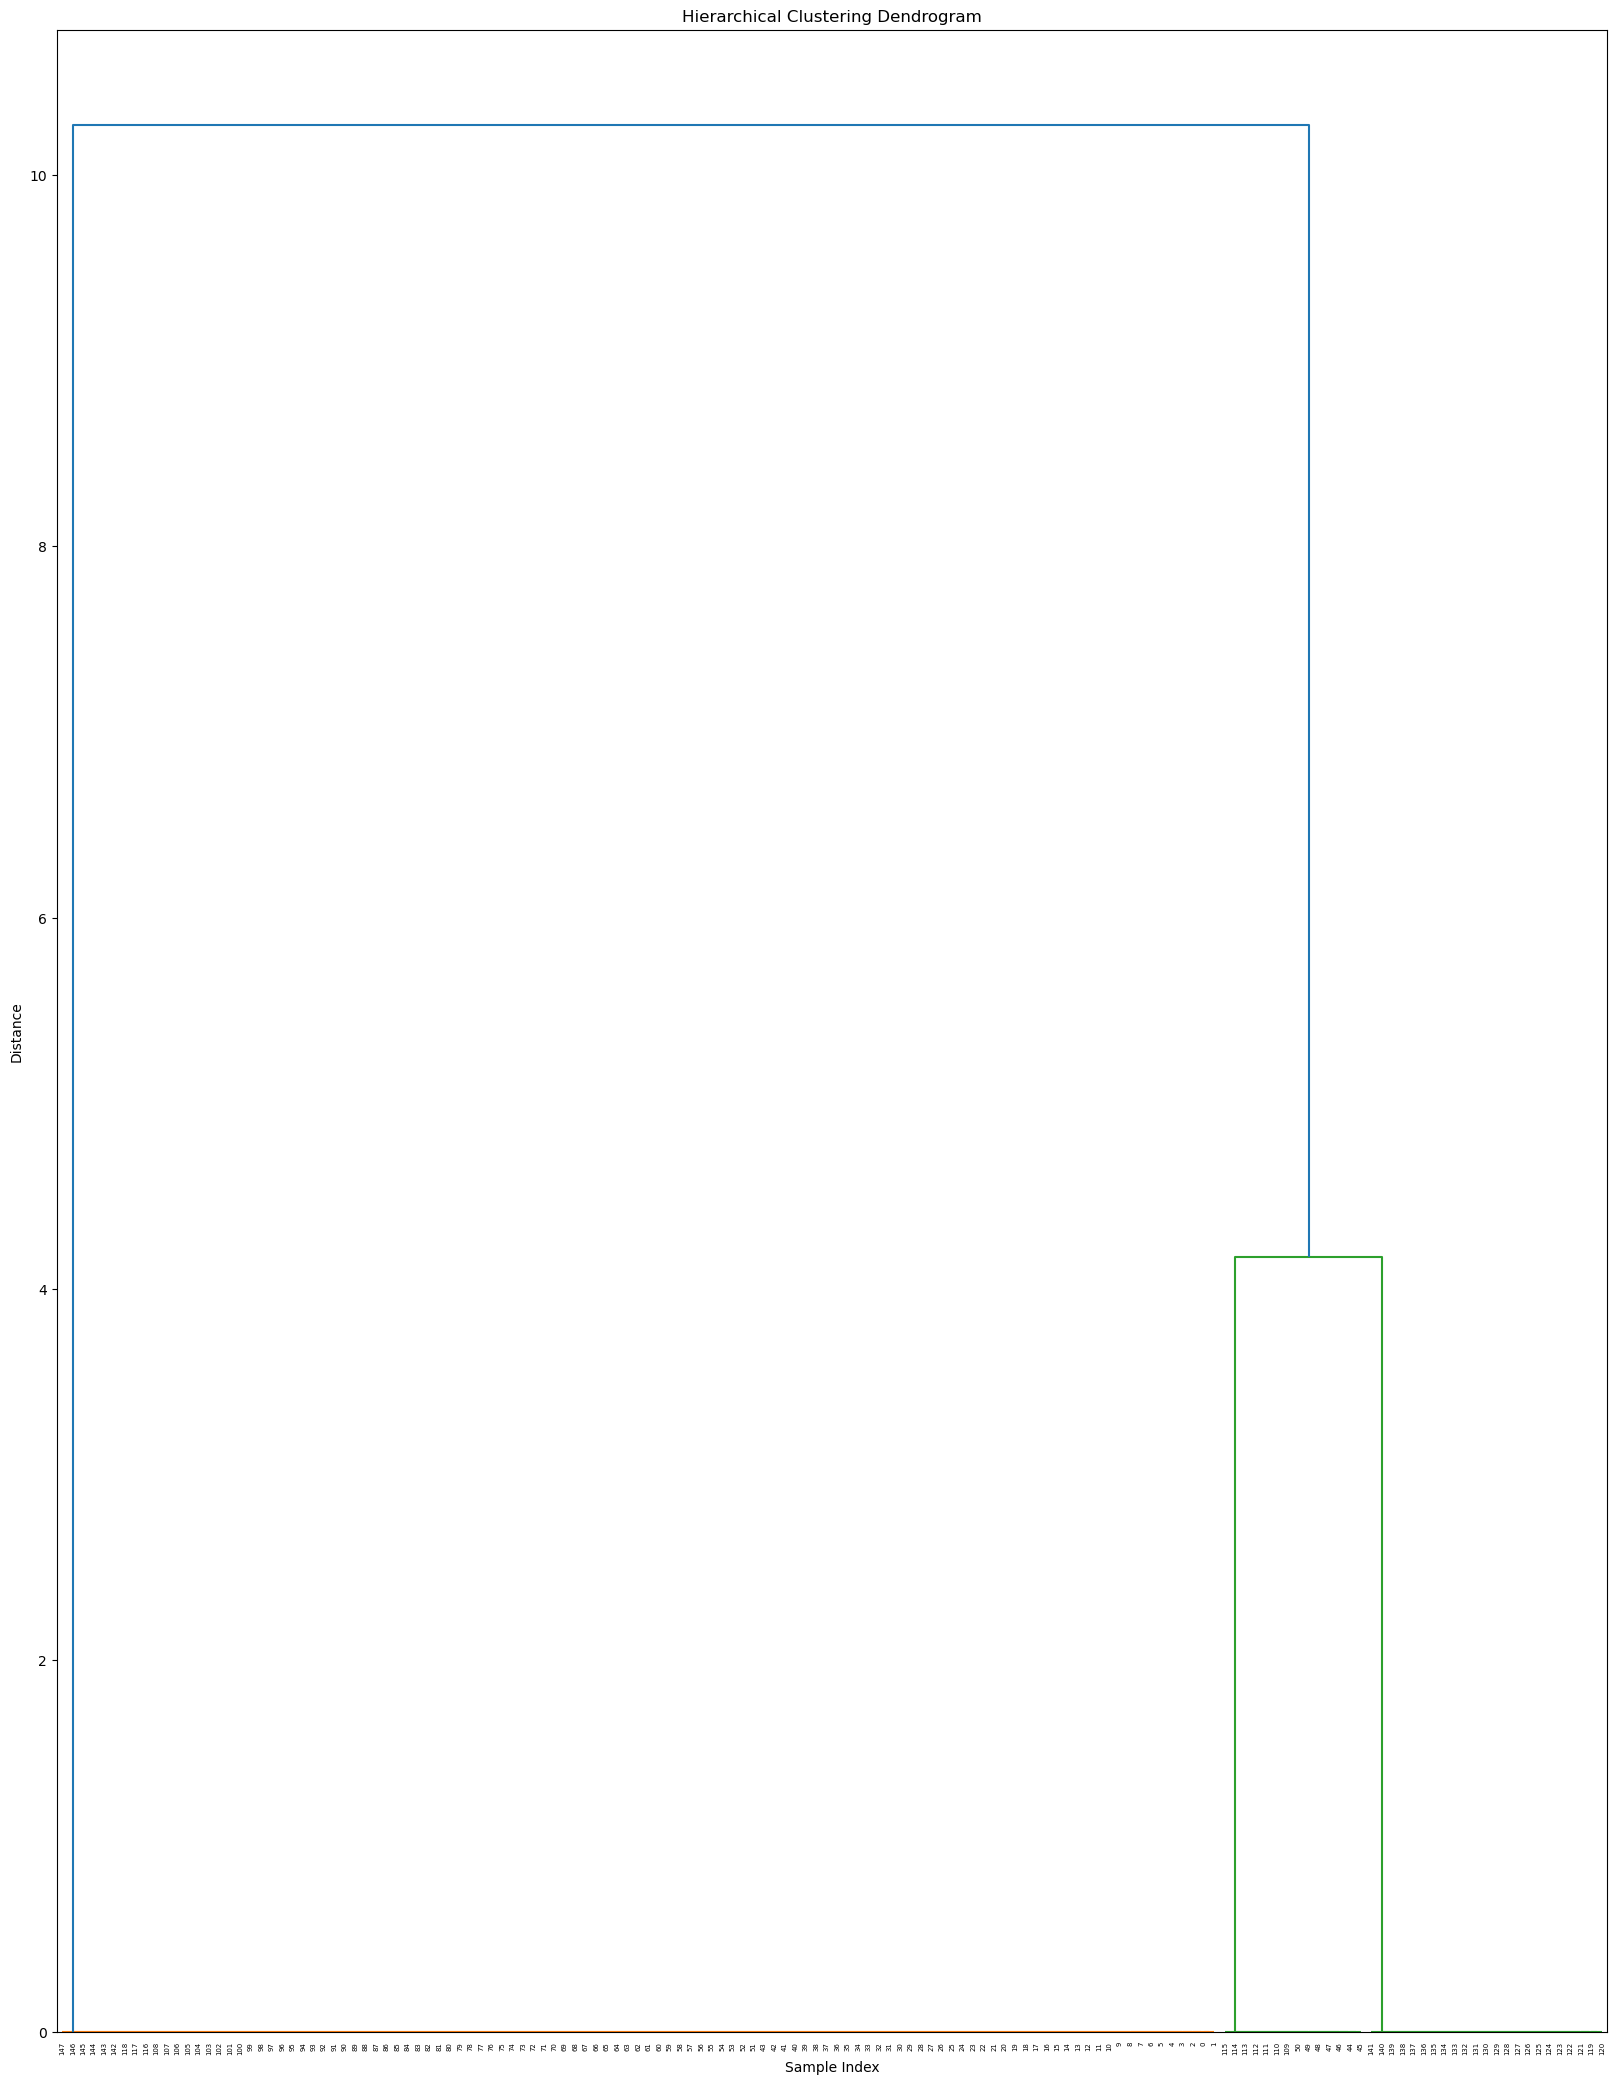

In [28]:
#h-clustering
# Extract relevant data for clustering
X = df[['Cluster']].values  # Assuming 'Cluster' contains numerical values

# Calculate distance matrix using Euclidean distance
Z = linkage(X, method='ward')  # You can use other linkage methods as well

# Plot dendrogram
plt.figure(figsize=(20, 26))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


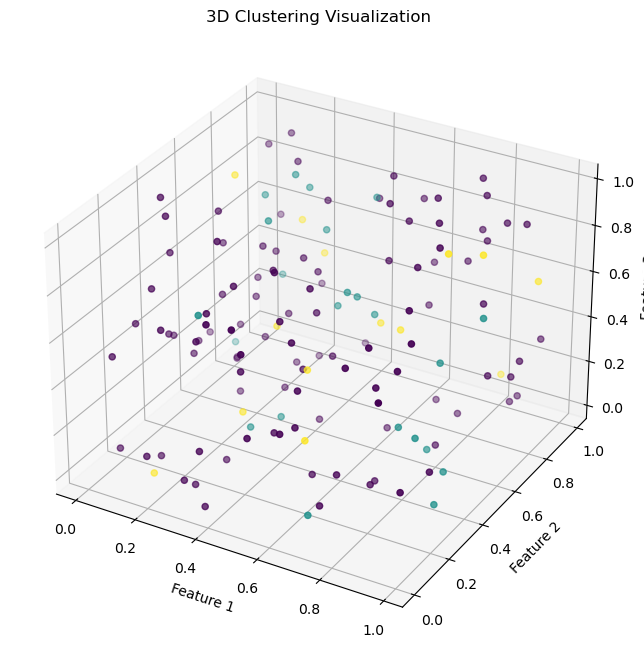

In [29]:
# Generate synthetic data with three features
np.random.seed(42)
num_samples = 148
feature1 = np.random.rand(num_samples)
feature2 = np.random.rand(num_samples)
feature3 = np.random.rand(num_samples)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, feature3, c=cluster_labels, cmap='viridis')
ax.set_title('3D Clustering Visualization')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()


In [30]:
X = df_scaled 
y = cluster_labels

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
y_pred = clf.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


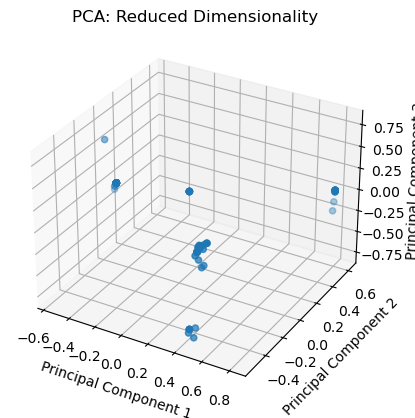

In [50]:
# Initialize PCA with desired number of components
pca = PCA(n_components=3)

# Fit and transform the data
df_reduced = pca.fit_transform(df_encoded)

# Create a new DataFrame with reduced dimensions
df_reduced = pd.DataFrame(data=df_reduced, columns=['PC1', 'PC2', 'PC3'])

# Plot the reduced data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_reduced['PC1'], df_reduced['PC2'], df_reduced['PC3'])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA: Reduced Dimensionality')
plt.show()

